JMJPFU
Lord bless this attempt of yours

In [1]:
!pip install opencv-python

     |████████████████████████████████| 28.2MB 5.0MB/s eta 0:00:01


In [3]:
!pip install imutils

Processing /home/acer/.cache/pip/wheels/16/84/1f/bf88641293cda2c8be81a5c4b8ca973dd9125a6dc3767417fd/imutils-0.5.3-cp37-none-any.whl


In [1]:
from imutils.object_detection import non_max_suppression
import cv2
import numpy as np
import time

import matplotlib.pyplot as plt

import sys
%matplotlib inline


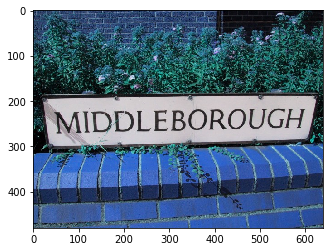

In [2]:
image = cv2.imread('/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Resume/opencv-text-recognition/images/example_02.jpg')


plt.imshow(image)


In [3]:
orig = image.copy()
(H,W) = image.shape[:2]

In [4]:
(newW,newH) = (320,320)
rW = W / float(newW)
rH = H / float(newH)

In [5]:
image = cv2.resize(image,(320,320))
(H,W) = image.shape[:2]

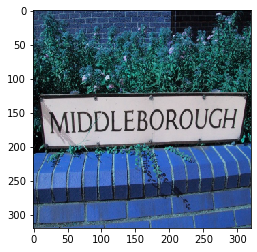

In [6]:
plt.imshow(image)

In [7]:
layerNames = ['feature_fusion/Conv_7/Sigmoid','feature_fusion/concat_3']

In [8]:
net = cv2.dnn.readNet('/media/acer/7DC832E057A5BDB1/JMJTL/Tomslabs/Resume/opencv-text-recognition/frozen_east_text_detection.pb')


In [9]:
blob = cv2.dnn.blobFromImage(image,1.0,(W,H),(123.68,116.78,103.94),swapRB=True,crop=False)

In [10]:
net.setInput(blob)

In [11]:
(scores,geometry) = net.forward(layerNames)

In [12]:
scores.shape

(1, 1, 80, 80)

In [13]:
geometry.shape

(1, 5, 80, 80)

In [14]:
scores.shape[2:4]

(80, 80)

In [15]:
(numrows,numcols)= scores.shape[2:4]
print(numcols)
numrows

80


80

In [67]:
for y in range(0, numrows):
	# extract the scores (probabilities), followed by the geometrical
	# data used to derive potential bounding box coordinates that
	# surround text
	scoresData = scores[0, 0, y]
	xData0 = geometry[0, 0, y]
	xData1 = geometry[0, 1, y]
	xData2 = geometry[0, 2, y]
	xData3 = geometry[0, 3, y]
	anglesData = geometry[0, 4, y]

In [73]:
xData0

array([140.49916 ,  91.427895,  89.60037 ,  85.49491 ,  80.851105,
        76.23273 ,  69.71601 ,  61.694237,  56.05683 ,  50.663025,
        42.94792 ,  35.6374  ,  30.392069,  24.701515,  20.343311,
        17.578362,  16.468727,  15.996491,  16.68819 ,  16.708849,
        16.142138,  15.511415,  15.850542,  16.912924,  18.262762,
        18.828716,  20.197605,  22.773027,  27.27457 ,  34.573997,
        49.427628,  76.063805, 106.57404 , 125.57973 , 137.03429 ,
       141.96707 , 145.2981  , 144.21811 , 141.06317 , 137.57443 ,
       133.59456 , 129.2208  , 122.285675, 107.25228 ,  91.14202 ,
        76.81764 ,  57.60354 ,  44.803474,  37.115326,  32.087162,
        28.707596,  25.662916,  23.578499,  21.867496,  20.638458,
        19.762255,  19.191843,  19.16296 ,  19.129635,  19.66838 ,
        20.761639,  21.605585,  23.104414,  24.792595,  26.606255,
        28.181662,  31.53243 ,  36.924072,  50.560574,  69.7231  ,
        92.94493 , 112.77672 , 125.74316 , 131.38846 , 135.269

In [16]:
rects = []
confidences = []

In [17]:
for y in range(0, numrows):
	# extract the scores (probabilities), followed by the geometrical
	# data used to derive potential bounding box coordinates that
	# surround text
	scoresData = scores[0, 0, y]
	xData0 = geometry[0, 0, y]
	xData1 = geometry[0, 1, y]
	xData2 = geometry[0, 2, y]
	xData3 = geometry[0, 3, y]
	anglesData = geometry[0, 4, y]
    # loop over the number of columns
	for x in range(0, numcols):
		# if our score does not have sufficient probability, ignore it
		if scoresData[x] < 0.5:
			continue
		# compute the offset factor as our resulting feature maps will
		# be 4x smaller than the input image
		(offsetX, offsetY) = (x * 4.0, y * 4.0)
		# extract the rotation angle for the prediction and then
		# compute the sin and cosine
		angle = anglesData[x]
		cos = np.cos(angle)
		sin = np.sin(angle)
		# use the geometry volume to derive the width and height of
		# the bounding box
		h = xData0[x] + xData2[x]
		w = xData1[x] + xData3[x]
		# compute both the starting and ending (x, y)-coordinates for
		# the text prediction bounding box
		endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
		endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
		startX = int(endX - w)
		startY = int(endY - h)
		# add the bounding box coordinates and probability score to
		# our respective lists
		rects.append((startX, startY, endX, endY))
		confidences.append(scoresData[x])

In [18]:
rects

[(24, 137, 324, 176),
 (25, 134, 322, 174),
 (25, 134, 326, 173),
 (24, 132, 325, 170),
 (24, 134, 329, 173),
 (23, 136, 330, 175),
 (22, 138, 330, 177),
 (21, 137, 330, 176),
 (22, 137, 330, 176),
 (23, 136, 331, 175),
 (23, 137, 325, 176),
 (23, 135, 319, 175),
 (24, 135, 311, 173),
 (23, 134, 307, 173),
 (25, 135, 306, 174),
 (25, 135, 307, 174),
 (22, 136, 307, 175),
 (21, 135, 306, 174),
 (24, 135, 311, 173),
 (23, 135, 308, 174),
 (22, 135, 307, 174),
 (24, 135, 304, 175),
 (25, 135, 302, 175),
 (26, 135, 303, 175),
 (25, 134, 303, 174),
 (27, 134, 307, 173),
 (29, 134, 306, 173),
 (29, 135, 304, 175),
 (28, 137, 304, 177),
 (30, 136, 306, 176),
 (29, 136, 306, 175),
 (25, 136, 302, 176),
 (27, 137, 304, 177),
 (28, 138, 301, 178),
 (28, 137, 303, 178),
 (27, 137, 303, 178),
 (26, 136, 302, 177),
 (26, 136, 302, 177),
 (27, 135, 304, 176),
 (27, 137, 304, 177),
 (26, 137, 303, 177),
 (29, 139, 300, 179),
 (28, 139, 299, 180),
 (26, 139, 300, 181),
 (25, 138, 302, 180),
 (26, 139,

In [19]:
confidences

[0.98554695,
 0.9996859,
 0.99980253,
 0.99980944,
 0.9998067,
 0.9998053,
 0.9997812,
 0.9998072,
 0.9997589,
 0.99978524,
 0.99979264,
 0.9998265,
 0.99982893,
 0.9998348,
 0.9997882,
 0.9997608,
 0.9997719,
 0.99977535,
 0.99979144,
 0.999801,
 0.999819,
 0.9998122,
 0.99981385,
 0.9997683,
 0.9997464,
 0.9996985,
 0.99968624,
 0.9997243,
 0.9997198,
 0.9997116,
 0.99968374,
 0.9997161,
 0.99974114,
 0.9996656,
 0.9996917,
 0.9996555,
 0.99956304,
 0.99944156,
 0.999303,
 0.99913114,
 0.9991591,
 0.99896693,
 0.99919146,
 0.99926406,
 0.9992735,
 0.99930584,
 0.9993586,
 0.99940026,
 0.9993606,
 0.9993773,
 0.99953794,
 0.9995627,
 0.99963236,
 0.99968386,
 0.999705,
 0.9997538,
 0.99977213,
 0.99980515,
 0.9998024,
 0.99978894,
 0.9998153,
 0.99984944,
 0.99978095,
 0.8494398,
 0.9870253,
 0.9998728,
 0.99992394,
 0.9999386,
 0.99993634,
 0.99994206,
 0.9999403,
 0.999948,
 0.9999447,
 0.99994695,
 0.999949,
 0.99994886,
 0.9999467,
 0.9999467,
 0.99994147,
 0.99994135,
 0.9999473,

In [25]:
# apply non-maxima suppression to suppress weak, overlapping bounding
# boxes
boxes = non_max_suppression(np.array(rects), probs=confidences)
# loop over the bounding boxes
for (startX, startY, endX, endY) in boxes:
	# scale the bounding box coordinates based on the respective
	# ratios
	startX = int(startX * rW)
	startY = int(startY * rH)    
	endX = int(endX * rW)
	endY = int(endY * rH)
	# draw the bounding box on the image
	cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)
# show the output image
cv2.imshow("Text Detection", orig)
#cv2.waitKey(0)

In [ ]:
i = 0
for (startX, startY, endX, endY) in boxes:
    print(startX,startY,endX,endY)
    i += 1
    print(i)

In [23]:
boxes = non_max_suppression(np.array(rects), probs=confidences)
boxes

array([[-60, 143, 300, 182]])

In [1]:
import pytesseract

ModuleNotFoundError: No module named 'pytesseract'